<a href="https://colab.research.google.com/github/shreyasat27/pennylane-27524/blob/main/double_slit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Double slit experiment

Author: Mainak Bhattacharyya

Credit: Maria Violaris (repo quantum-paradoxes)

The double slit phenomenon of quantum particles distinguishes itself from the classical nature of the particles. For instance the dual nature of quantum particles can be seen from the double slit experiment. Also, the so called feature "Measurement destroys the quantum properties" is also seen from these experiment.
<br><br>
The expected classical schematics of the experiment can be seen from the below figure:

If we instead of classical particles run the experiment for qubits we observe the following interference pattern. The intution behind the trajectory of the particles are that we don't know apriori which slit is used by the particular quantum particles. As soon as we try to observe the trajectory of the quantum particles, the interference pattern is lost and we get the previous classical results for the double slit experiment.

No detector on the path of a qubit:

1. The single qubit system is in a superposition of two states (due to application of a Hadamard gate).
2. |0> and |1> represents two orthogonal quantum states.
4. As the quantum system is reversible, action of a Hadamard gate again on the qubit takes it back to the original state.

This can also be visualized as an experiment with beamsplitter.

We compare the double slit experiment with this beam splitter setup. For instance there are two possibilities for photon traversing either through slit `S1` or slit `S2`. Similarly, in this case photons might travell through blue horizontal path or cyan vertical path.

The point to note is that in both cases one can not now which path a particular photon takes without observing. Along with observation the quantum nature of the system gets destroyed.

In [5]:
!pip install pennylane

In [6]:
# Import the pennylane module
import pennylane as qml

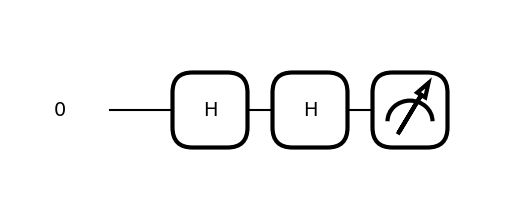

In [16]:
# Define a quantum device.
device = qml.device("default.qubit", wires = 1, shots=1000)

# A perfect quantum setup
@qml.qnode(device)
def no_detector():
    # Your code goes here ->
    qml.Hadamard(wires=0)
    qml.Hadamard(wires=0)
    return qml.counts(qml.PauliZ(wires=0))
fig, ax = qml.draw_mpl(no_detector)()
fig.show()

execute the circuit

In [15]:
no_detector()

{'0': tensor(1000, requires_grad=True)}

Now we will appy a mid circuit measurement

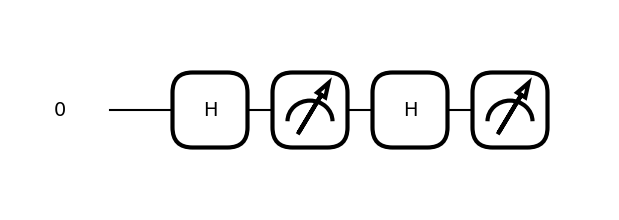

In [19]:
# Disturb the quantum system.
@qml.qnode(device)
def with_detector():
    qml.Hadamard(wires=0)
    qml.measure(wires=0)
    qml.Hadamard(wires=0)
    return qml.counts(qml.PauliZ(wires=0))
fig, ax = qml.draw_mpl(with_detector)()
fig.show()

In [20]:
with_detector()

{-1: tensor(503, requires_grad=True), 1: tensor(497, requires_grad=True)}